In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_full = pd.read_csv('billboard_24years_lyrics_spotify.csv')

In [42]:
# 마지막 2행 제거
df_full = df_full.iloc[:-4]

In [43]:
df_full.columns

Index(['ranking', 'song', 'band_singer', 'songurl', 'titletext', 'url', 'year',
       'lyrics', 'uri', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [44]:

# 연도별로 동일한 노래 제목에 대해 첫 번째 메인 가수만 남기고 나머지 삭제
df_unique = df_full.drop_duplicates(subset=['year', 'song'], keep='first')

# 모든 열을 출력하도록 설정
pd.set_option('display.max_columns', None)

# 100개 행을 출력하되, 중간에 생략되지 않도록 설정
pd.set_option('display.max_rows', 100)

# 결과 출력
print(df_unique)

      ranking                          song       band_singer  \
0           1                       Breathe        Faith Hill   
1           2                        Smooth           Santana   
3           3                   Maria Maria           Santana   
5           4                  I Wanna Know               Joe   
6           5           Everything You Want  Vertical Horizon   
...       ...                           ...               ...   
3385       96  Bzrp Music Sessions, Vol. 53          Bizarrap   
3387       97                      Meltdown      Travis Scott   
3389       98      Put It on da Floor Again             Latto   
3391       99                   Bloody Mary         Lady Gaga   
3392      100          Watermelon Moonshine     Lainey Wilson   

                                                songurl  \
0                       /wiki/Breathe_(Faith_Hill_song)   
1                           /wiki/Smooth_(Santana_song)   
3                                     /wik

In [45]:

# song과 band_singer 열만 선택해서 상위 100개 행 보기
print(df_unique[['ranking', 'song', 'band_singer','year']].head(100))

     ranking                                   song            band_singer  \
0          1                                Breathe             Faith Hill   
1          2                                 Smooth                Santana   
3          3                            Maria Maria                Santana   
5          4                           I Wanna Know                    Joe   
6          5                    Everything You Want       Vertical Horizon   
7          6                            Say My Name        Destiny's Child   
8          7                     I Knew I Loved You          Savage Garden   
9          8                                 Amazed               Lonestar   
10         9                                   Bent        Matchbox Twenty   
11        10                   He Wasn't Man Enough           Toni Braxton   
12        11                                 Higher                  Creed   
13        12                              Try Again             

In [50]:
df = pd.read_csv('artist_countries1.csv')

In [51]:
# Artist 피처에서 'Diddy ??Dirty Money' 값을 'Diddy -- Dirty Money'로 변경
df['Artist'] = df['Artist'].replace('Diddy ??Dirty Money', 'Diddy – Dirty Money')

# 결과 확인 (변경된 행만 출력)
print(df[df['Artist'] == 'Diddy – Dirty Money'])

                  Artist Country
371  Diddy – Dirty Money      US


In [52]:
# 국가 코드 확인 (유니크한 값)
print(df['Country'].unique())

['US' 'GB' 'CU' 'FR' 'JM' 'ES' 'CA' 'NZ' 'NG' 'DK' 'AU' 'JP' 'BE' 'CO'
 'NL' 'UK' 'SE' 'DZ' 'HT' 'VE' 'KR' 'DE' 'IN' 'IT' 'GY' 'AT' 'RO' 'NO'
 'PR' 'IE' 'VC' 'MX' 'IS' 'BB' 'XG' 'VG' 'PH' 'SN' 'AR' 'PK']


In [53]:
df

Artist Country
0         Blueface      US
1            Kandi      US
2       The Script      GB
3          'N Sync      US
4          Estelle      GB
...            ...     ...
1034      Jay Rock      US
1035    Silk Sonic      US
1036  Daddy Yankee      PR
1037    Neon Trees      US
1038        Sammie      US

[1039 rows x 2 columns]

In [54]:

# 데이터 병합
df_sorted = pd.merge(df_unique, df, left_on='band_singer', right_on='Artist', how='left', suffixes=('', '_new'))

# 열 이름 변경
df_sorted.rename(columns={'Artist_new': 'Artist', 'Country_new': 'Country'}, inplace=True)

# 열 순서 변경
cols = df_sorted.columns.tolist()
band_singer_index = cols.index('band_singer')
cols.insert(band_singer_index + 1, cols.pop(cols.index('Artist')))
cols.insert(band_singer_index + 2, cols.pop(cols.index('Country')))
df_sorted = df_sorted[cols]



In [56]:
# 'band_singer' 열 옆으로 'Country' 열을 이동
cols = df_sorted.columns.tolist()
band_singer_index = cols.index('band_singer')
cols.insert(band_singer_index + 1, cols.pop(cols.index('Country')))
df_sorted = df_sorted[cols]

In [57]:
df_sorted

ranking                          song       band_singer Country  \
0           1                       Breathe        Faith Hill      US   
1           2                        Smooth           Santana      US   
2           3                   Maria Maria           Santana      US   
3           4                  I Wanna Know               Joe      GB   
4           5           Everything You Want  Vertical Horizon      US   
...       ...                           ...               ...     ...   
2382       96  Bzrp Music Sessions, Vol. 53          Bizarrap      AR   
2383       97                      Meltdown      Travis Scott      US   
2384       98      Put It on da Floor Again             Latto      US   
2385       99                   Bloody Mary         Lady Gaga      US   
2386      100          Watermelon Moonshine     Lainey Wilson      US   

                Artist                                            songurl  \
0           Faith Hill                    /wiki/Breathe_(Faith_Hill_song)   
1              Santana                        /wiki/Smooth_(Santana_song)   
2              Santana                                  /wiki/Maria_Maria   
3                  Joe                      /wiki/I_Wanna_Know_(Joe_song)   
4     Vertical Horizon  /wiki/Everything_You_Want_(Vertical_Horizon_song)   
...                ...                                                ...   
2382          Bizarrap                 /wiki/Bzrp_Music_Sessions,_Vol._53   
2383      Travis Scott                 /wiki/Meltdown_(Travis_Scott_song)   
2384             Latto                     /wiki/Put_It_on_da_Floor_Again   
2385         Lady Gaga                           /wiki/Bloody_Mary_(song)   
2386     Lainey Wilson                         /wiki/Watermelon_Moonshine   

                         titletext                     url  year  \
0                          Breathe        /wiki/Faith_Hill  2000   
1                           Smooth    /wiki/Santana_(band)  2000   
2                      Maria Maria    /wiki/Santana_(band)  2000   
3                     I Wanna Know      /wiki/Joe_(singer)  2000   
4              Everything You Want  /wiki/Vertical_Horizon  2000   
...                            ...                     ...   ...   
2382  Bzrp Music Sessions, Vol. 53          /wiki/Bizarrap  2023   
2383                      Meltdown      /wiki/Travis_Scott  2023   
2384      Put It on da Floor Again             /wiki/Latto  2023   
2385                   Bloody Mary         /wiki/Lady_Gaga  2023   
2386          Watermelon Moonshine     /wiki/Lainey_Wilson  2023   

                                                 lyrics  \
0     I can feel the magic floating in the air\nBein...   
1     Man, it's a hot one\nLike seven inches from th...   
2     Ladies and gents, turn up your sound systems\n...   
3     Yeah\nOh-oh, yeah\nAlright, oh, oh, oh\n\nIt's...   
4     Somewhere there's speaking\nIt's already comin...   
...                                                 ...   
2382  \n(Pa' tipos como tú, uh-uh-uh-uh)\nOh-oh (Oh-...   
2383  \nYeah\nTensions is definitely rising\nT'd up ...   
2384  (Go Grizz)\nAh (Squat made the beat)\nWhat's h...   
2385  Money\n\nLove is just a history that they may ...   
2386  It was right after senior year\nJust before th...   

                                       uri  danceability  energy  key  \
0     spotify:track:3y4LxiYMgDl4RethdzpmNe         0.529   0.496  7.0   
1     spotify:track:0n2SEXB2qoRQg171q7XqeW         0.609   0.923  9.0   
2     spotify:track:3XKIUb7HzIF1Vu9usunMzc         0.777   0.601  2.0   
3     spotify:track:1m2xMsxbtxv21Brome189p         0.725   0.487  8.0   
4     spotify:track:4cKGldbhGJniI8BrB3K6tb         0.636   0.761  3.0   
...                                    ...           ...     ...  ...   
2382  spotify:track:4nrPB8O7Y7wsOCJdgXkthe           NaN     NaN  NaN   
2383  spotify:track:67nepsnrcZkowTxMWigSbb           NaN     NaN  NaN   
2384  spotify:track:6

In [58]:
country_dict = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CU': 'Cuba',
    'FR': 'France',
    'JM': 'Jamaica',
    'ES': 'Spain',
    'CA': 'Canada',
    'NZ': 'New Zealand',
    'NG': 'Nigeria',
    'DK': 'Denmark',
    'AU': 'Australia',
    'JP': 'Japan',
    'BE': 'Belgium',
    'CO': 'Colombia',
    'NL': 'Netherlands',
    'UK': 'United Kingdom',  # 'UK'는 'GB'와 동일하게 사용됨
    'SE': 'Sweden',
    'DZ': 'Algeria',
    'HT': 'Haiti',
    'VE': 'Venezuela',
    'KR': 'South Korea',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'GY': 'Guyana',
    'AT': 'Austria',
    'RO': 'Romania',
    'NO': 'Norway',
    'PR': 'Puerto Rico',
    'IE': 'Ireland',
    'VC': 'Saint Vincent', # 길어서 Saint Vincent and the Grenadines
    'MX': 'Mexico',
    'IS': 'Iceland',
    'BB': 'Barbados',
    'XG': 'United States',  # 수정 필요 시 GA로 교체
    'VG': 'British Virgin Islands',
    'PH': 'Philippines',
    'SN': 'Senegal',
    'AR': 'Argentina',
    'PK': 'Pakistan'
}

In [59]:
# Country 열을 확인하고, 새로운 Country_Fullname 열 생성, 매칭
df_sorted['Country_Fullname'] = df_sorted['Country'].map(country_dict)

# 결과 확인 (상위 100개 행만 출력)
print(df_sorted.head(100))

    ranking                                   song            band_singer  \
0         1                                Breathe             Faith Hill   
1         2                                 Smooth                Santana   
2         3                            Maria Maria                Santana   
3         4                           I Wanna Know                    Joe   
4         5                    Everything You Want       Vertical Horizon   
5         6                            Say My Name        Destiny's Child   
6         7                     I Knew I Loved You          Savage Garden   
7         8                                 Amazed               Lonestar   
8         9                                   Bent        Matchbox Twenty   
9        10                   He Wasn't Man Enough           Toni Braxton   
10       11                                 Higher                  Creed   
11       12                              Try Again                Aaliyah   

/var/folders/vk/k2jbrnys5674kpkvxhf0q_8r0000gn/T/ipykernel_4196/11006460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['Country_Fullname'] = df_sorted['Country'].map(country_dict)


In [60]:
# 열 순서 재정렬: year 열 다음에 Country_Fullname 열을 위치시키기
columns = list(df_sorted.columns)
columns.insert(columns.index('year') + 1, columns.pop(columns.index('Country_Fullname')))
df_sorted = df_sorted[columns]

In [61]:
# 열 순서 재정렬: band_singer 열 다음에 year 열과 Country_Fullname 열을 위치시키기
columns = list(df_sorted.columns)
year_index = columns.index('year')
country_fullname_index = columns.index('Country_Fullname')
band_singer_index = columns.index('band_singer')

# year 열과 Country_Fullname 열을 리스트에서 제거하고 band_singer 옆에 삽입
columns.insert(band_singer_index + 1, columns.pop(year_index))
columns.insert(band_singer_index + 2, columns.pop(country_fullname_index))

# 데이터프레임의 열 순서를 재정렬
df_sorted = df_sorted[columns]


In [62]:
# 결과 확인 (상위 100개 행만 출력)
df_sorted

ranking                          song       band_singer  year  \
0           1                       Breathe        Faith Hill  2000   
1           2                        Smooth           Santana  2000   
2           3                   Maria Maria           Santana  2000   
3           4                  I Wanna Know               Joe  2000   
4           5           Everything You Want  Vertical Horizon  2000   
...       ...                           ...               ...   ...   
2382       96  Bzrp Music Sessions, Vol. 53          Bizarrap  2023   
2383       97                      Meltdown      Travis Scott  2023   
2384       98      Put It on da Floor Again             Latto  2023   
2385       99                   Bloody Mary         Lady Gaga  2023   
2386      100          Watermelon Moonshine     Lainey Wilson  2023   

     Country_Fullname Country            Artist  \
0       United States      US        Faith Hill   
1       United States      US           Santana   
2       United States      US           Santana   
3      United Kingdom      GB               Joe   
4       United States      US  Vertical Horizon   
...               ...     ...               ...   
2382        Argentina      AR          Bizarrap   
2383    United States      US      Travis Scott   
2384    United States      US             Latto   
2385    United States      US         Lady Gaga   
2386    United States      US     Lainey Wilson   

                                                songurl  \
0                       /wiki/Breathe_(Faith_Hill_song)   
1                           /wiki/Smooth_(Santana_song)   
2                                     /wiki/Maria_Maria   
3                         /wiki/I_Wanna_Know_(Joe_song)   
4     /wiki/Everything_You_Want_(Vertical_Horizon_song)   
...                                                 ...   
2382                 /wiki/Bzrp_Music_Sessions,_Vol._53   
2383                 /wiki/Meltdown_(Travis_Scott_song)   
2384                     /wiki/Put_It_on_da_Floor_Again   
2385                           /wiki/Bloody_Mary_(song)   
2386                         /wiki/Watermelon_Moonshine   

                         titletext                     url  \
0                          Breathe        /wiki/Faith_Hill   
1                           Smooth    /wiki/Santana_(band)   
2                      Maria Maria    /wiki/Santana_(band)   
3                     I Wanna Know      /wiki/Joe_(singer)   
4              Everything You Want  /wiki/Vertical_Horizon   
...                            ...                     ...   
2382  Bzrp Music Sessions, Vol. 53          /wiki/Bizarrap   
2383                      Meltdown      /wiki/Travis_Scott   
2384      Put It on da Floor Again             /wiki/Latto   
2385                   Bloody Mary         /wiki/Lady_Gaga   
2386          Watermelon Moonshine     /wiki/Lainey_Wilson   

                                                 lyrics  \
0     I can feel the magic floating in the air\nBein...   
1     Man, it's a hot one\nLike seven inches from th...   
2     Ladies and gents, turn up your sound systems\n...   
3     Yeah\nOh-oh, yeah\nAlright, oh, oh, oh\n\nIt's...   
4     Somewhere there's speaking\nIt's already comin...   
...                                                 ...   
2382  \n(Pa' tipos como tú, uh-uh-uh-uh)\nOh-oh (Oh-...   
2383  \nYeah\nTensions is definitely rising\nT'd up ...   
2384  (Go Grizz)\nAh (Squat made the beat)\nWhat's h...   
2385  Money\n\nLove is just a history that they may ...   
2386  It was right after senior year\nJust before th...   

                                       uri  danceability  energy  key  \
0     spotify:track:3y4LxiYMgDl4RethdzpmNe         0.529   0.496  7.0   
1     spotify:track:0n2SEXB2qoRQg171q7XqeW         0.609   0.923  9.0   
2     spotify:track:3XKIUb7HzIF1Vu9usunMzc         0.777   0.601  2.0   
3     spotify:track:1m2xMsxbtxv21Brome189p         0.725   0.487  8.0   
4     spotif

In [63]:
# song, band_singer, Artist, Country, Country Full Name 열에서 NaN 값을 포함한 행 필터링
nan_rows = df_sorted[df_sorted[['song', 'band_singer', 'Artist', 'Country', 'Country_Fullname']].isna().any(axis=1)]

# NaN 값을 포함한 행 출력
print(nan_rows)

# NaN 값이 포함된 행의 개수를 출력하려면
nan_count = nan_rows.shape[0]
print(f"NaN 값을 포함한 행의 개수: {nan_count}")

Empty DataFrame
Columns: [ranking, song, band_singer, year, Country_Fullname, Country, Artist, songurl, titletext, url, lyrics, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, track_href, analysis_url, duration_ms, time_signature]
Index: []
NaN 값을 포함한 행의 개수: 0


In [64]:
# 연도별 국가별 가수 수 집계
grouped = df_sorted.groupby(['year', 'Country_Fullname']).size().reset_index(name='Artist_Count')

# 결과 확인
print(grouped)


     year Country_Fullname  Artist_Count
0    2000        Australia             2
1    2000           Canada             2
2    2000          Germany             3
3    2000          Ireland             2
4    2000            Italy             1
..    ...              ...           ...
205  2023      Puerto Rico             1
206  2023      South Korea             1
207  2023            Spain             1
208  2023   United Kingdom             8
209  2023    United States            72

[210 rows x 3 columns]


In [65]:
# 연도별 국가별 가수 수 집계
grouped = df_sorted.groupby(['year', 'Country_Fullname']).size().reset_index(name='Artist_Count')

# 모든 조합을 생성하지 않고 NaN을 0으로 변환 후, 정수형으로 변환
grouped_complete = grouped.pivot_table(index='year', columns='Country_Fullname', values='Artist_Count', fill_value=0).reset_index()
grouped_complete = grouped_complete.astype(int)

# 결과 확인
print(grouped_complete)

Country_Fullname  year  Algeria  Argentina  Australia  Austria  Barbados  \
0                 2000        0          0          2        0         0   
1                 2001        0          0          0        0         0   
2                 2002        0          0          1        0         0   
3                 2003        0          0          0        0         0   
4                 2004        0          0          2        0         0   
5                 2005        0          0          0        0         0   
6                 2006        0          0          0        0         0   
7                 2007        0          0          0        0         0   
8                 2008        0          0          0        0         0   
9                 2009        0          0          0        0         0   
10                2010        1          0          1        0         1   
11                2011        1          0          0        0         0   
12          

In [66]:
# 'Country Full Name'을 기준으로 가수, 연도, 순위를 리스트로 묶음
grouped_range = df_sorted.groupby('Country_Fullname').agg({
    'band_singer': lambda x: list(x),
    'year': lambda x: list(x),
    'ranking': lambda x: list(x)
}).reset_index()

# band_singer, year, ranking 리스트를 세로로 펼쳐서 표현
exploded_grouped = grouped_range.explode(['band_singer', 'year', 'ranking']).reset_index(drop=True)

# 국가별로 데이터를 구분하여 출력
country_names = exploded_grouped['Country_Fullname'].unique()

# 각 국가별로 구분하여 출력
for country in country_names:
    print(f"=== {country} ===")
    display(exploded_grouped[exploded_grouped['Country_Fullname'] == country][['band_singer', 'year', 'ranking']])
    print("\n")

=== Algeria ===


band_singer  year ranking
0   DJ Khaled  2010      79
1   DJ Khaled  2011      47
2   DJ Khaled  2016      59
3   DJ Khaled  2017      12
4   DJ Khaled  2017      18
5   DJ Khaled  2018      73
6   DJ Khaled  2020      66
7   DJ Khaled  2021      59



=== Argentina ===


band_singer  year ranking
8    Bizarrap  2023      96



=== Australia ===


band_singer  year ranking
9         Savage Garden  2000       7
10        Savage Garden  2000      78
11        Kylie Minogue  2002      45
12                  Jet  2004      76
13          Keith Urban  2004      93
14             Orianthi  2010      55
15                Gotye  2012       1
16                  Sia  2014      25
17  5 Seconds of Summer  2014      86
18  5 Seconds of Summer  2014      93
19                  Sia  2015      52
20            Vance Joy  2015      71
21                  Sia  2015      90
22                  Sia  2016      11
23                Flume  2016      60
24          Keith Urban  2017     100
25  5 Seconds of Summer  2018      36
26  5 Seconds of Summer  2019      33
27          Tones and I  2020      14
28        The Kid Laroi  2021      12
29        The Kid Laroi  2021      17
30          Keith Urban  2021      81
31        The Kid Laroi  2022       3



=== Austria ===


band_singer  year ranking
32  Marian Hill  2017      90



=== Barbados ===


band_singer  year ranking
33   Shontelle  2010      70



=== Belgium ===


band_singer  year ranking
34         DHT  2005      35
35          CJ  2021      50



=== British Virgin Islands ===


band_singer  year ranking
36        Iyaz  2009      83
37        Iyaz  2010      25



=== Canada ===


band_singer  year ranking
38     Celine Dion  2000      28
39    soulDecision  2000      66
40   Nelly Furtado  2001      43
41           Tamia  2001      62
42   Nelly Furtado  2001      70
..             ...   ...     ...
193          Drake  2023      14
194          Drake  2023      43
195          Drake  2023      45
196     Zach Bryan  2023      74
197     Young Nudy  2023      94

[160 rows x 3 columns]



=== Colombia ===


band_singer  year ranking
198          Shakira  2002      28
199          Shakira  2002      66
200          Shakira  2005      60
201          Shakira  2006       5
202          Shakira  2009      64
203          Shakira  2014      85
204         J Balvin  2017      50
205         J Balvin  2018      99
206  Carolina Gaitán  2022      24



=== Denmark ===


band_singer  year ranking
207  Lukas Graham  2016      12



=== France ===


band_singer  year ranking
208  Amanda Perez  2003      69
209  David Guetta  2010      26
210  David Guetta  2011      73
211  David Guetta  2011      88
212  David Guetta  2012      24
213  David Guetta  2012      35
214  David Guetta  2012      50
215     Daft Punk  2013      14
216      DJ Snake  2014      15
217  David Guetta  2015      31
218      DJ Snake  2015      59
219      DJ Snake  2016      47
220      DJ Snake  2016      80
221      DJ Snake  2017      46
222      DJ Snake  2019      57
223  David Guetta  2023      10
224         Hardy  2023      54



=== Germany ===


band_singer  year ranking
225          Marc Anthony  2000      22
226          Marc Anthony  2000      23
227             Mary Mary  2000     100
228                 Dream  2001      28
229               Cascada  2006      31
230          Kevin Rudolf  2008      65
231          Kevin Rudolf  2009      32
232          Kevin Rudolf  2010      80
233                  Zedd  2013      24
234                  Zedd  2014      94
235                  Zedd  2017      17
236                  Zedd  2018       8
237                   Max  2018      66
238           Masked Wolf  2021      20
239  Oliver Anthony Music  2023      78



=== Guyana ===


band_singer  year ranking
240   Saint Jhn  2020      19



=== Haiti ===


band_singer  year ranking
241  Wyclef Jean  2008      56



=== Iceland ===


band_singer  year ranking
242  Of Monsters and Men  2013      65



=== India ===


band_singer  year ranking
243         Dev  2011      83



=== Ireland ===


band_singer  year ranking
244        Westlife  2000      75
245  Samantha Mumba  2000      98
246            Enya  2001      59
247              U2  2001      75
248          Hozier  2015      14
249     Niall Horan  2017      32



=== Italy ===


band_singer  year ranking
250   Eiffel 65  2000      49
251         Fun  2012       3
252         Fun  2012      14
253         Fun  2013      58
254         Fun  2013      76
255    Måneskin  2021      66



=== Jamaica ===


band_singer  year ranking
256         Shaggy  2001      12
257         Shaggy  2001      17
258      Sean Paul  2002      74
259      Sean Paul  2003       3
260      Sean Paul  2003      66
261      Sean Paul  2004      60
262     Beenie Man  2004      85
263      Sean Paul  2005      88
264      Sean Paul  2006       2
265      Sean Paul  2006      37
266      Sean Paul  2006      81
267  Sean Kingston  2007      31
268  Sean Kingston  2008      34
269  Sean Kingston  2009      33
270  Sean Kingston  2010      89
271    Major Lazer  2015      16
272    Major Lazer  2016      25
273    Major Lazer  2016      85



=== Japan ===


band_singer  year ranking
274  Thompson Square  2011      96
275           Magic!  2014       7



=== Mexico ===


band_singer  year ranking
276         Thalía  2003      95
277      Yng Lvcas  2023      40
278  Fuerza Regida  2023      73
279     Peso Pluma  2023      86
280     Peso Pluma  2023      90



=== Netherlands ===


band_singer  year ranking
281     Alice Deejay  2000      88
282  Natalie La Rose  2015      41
283  Duncan Laurence  2021      82



=== New Zealand ===


band_singer  year ranking
284       Lorde  2013      15
285       Lorde  2014      18
286       Lorde  2014      20
287   Jawsh 685  2020      35
288       Benee  2020      84



=== Nigeria ===


band_singer  year ranking
289      Wizkid  2021      60
290        CKay  2022      55
291      Wizkid  2022      64
292        Rema  2023       6



=== Norway ===


band_singer  year ranking
293   Rob Thomas  2005      22
294   Rob Thomas  2009      85
295        Ylvis  2013      73
296  Nico & Vinz  2014      14
297         Kygo  2017      27



=== Puerto Rico ===


band_singer  year ranking
298     Son by Four  2000      61
299    Ricky Martin  2001      55
300    Daddy Yankee  2006      74
301      Luis Fonsi  2017       2
302          Darell  2018      81
303    Daddy Yankee  2018      93
304       Bad Bunny  2019      44
305    Daddy Yankee  2019      65
306       Bad Bunny  2021      28
307       Bad Bunny  2021      83
308  Rauw Alejandro  2021     100
309       Bad Bunny  2022      20
310       Bad Bunny  2022      22
311       Bad Bunny  2022      44
312       Bad Bunny  2022      69
313       Bad Bunny  2022      77
314       Bad Bunny  2022      78
315       Bad Bunny  2022      87
316       Bad Bunny  2023      72



=== Saint Vincent ===


band_singer  year ranking
317  Kevin Lyttle  2004      27



=== Senegal ===


band_singer  year ranking
318        Akon  2004      44
319        Akon  2005      44
320        Akon  2006      66
321        Akon  2007       8
322        Akon  2007      11
323        Akon  2007      15
324        Akon  2009      54
325        Akon  2009      56



=== South Korea ===


band_singer  year ranking
326          Psy  2012      47
327          Psy  2013      55
328     Pinkfong  2019      75
329          BTS  2020      38
330          BTS  2021      11
331          BTS  2021      41
332  Fifty Fifty  2023      44



=== Spain ===


band_singer  year ranking
333  Enrique Iglesias  2000      37
334  Enrique Iglesias  2001      99
335  Enrique Iglesias  2002      22
336          DJ Sammy  2002      31
337  Enrique Iglesias  2002      57
338  Enrique Iglesias  2010      12
339  Enrique Iglesias  2011      16
340            Miguel  2011      92
341            Miguel  2012      97
342            Miguel  2013      84
343  Enrique Iglesias  2014      38
344            Miguel  2018      75
345            Miguel  2023      24



=== Sweden ===


band_singer  year ranking
346               Avicii  2013      19
347  Swedish House Mafia  2013      26
348            Icona Pop  2013      28
349               Avicii  2014      22
350              Tove Lo  2014      32
351               Avicii  2014      60
352              Tove Lo  2015      37
353              Tove Lo  2015      77
354         Zara Larsson  2016      46
355               Neiked  2022      73



=== United Kingdom ===


band_singer  year ranking
356         Joe  2000       4
357       BBMak  2000      33
358     Sonique  2000      34
359   Blink 182  2000      40
360       Sting  2000      50
..          ...   ...     ...
589    Dua Lipa  2023      35
590        Raye  2023      48
591  Ed Sheeran  2023      64
592     Karol G  2023      65
593       Wham!  2023      84

[238 rows x 3 columns]



=== United States ===


band_singer  year ranking
594         Faith Hill  2000       1
595            Santana  2000       2
596            Santana  2000       3
597   Vertical Horizon  2000       5
598    Destiny's Child  2000       6
...                ...   ...     ...
2382     Morgan Wallen  2023      95
2383      Travis Scott  2023      97
2384             Latto  2023      98
2385         Lady Gaga  2023      99
2386     Lainey Wilson  2023     100

[1793 rows x 3 columns]

# 미국이외 가수들이 가장 많이 활동한 년도를 알수 있음

<Figure size 1500x1000 with 0 Axes>

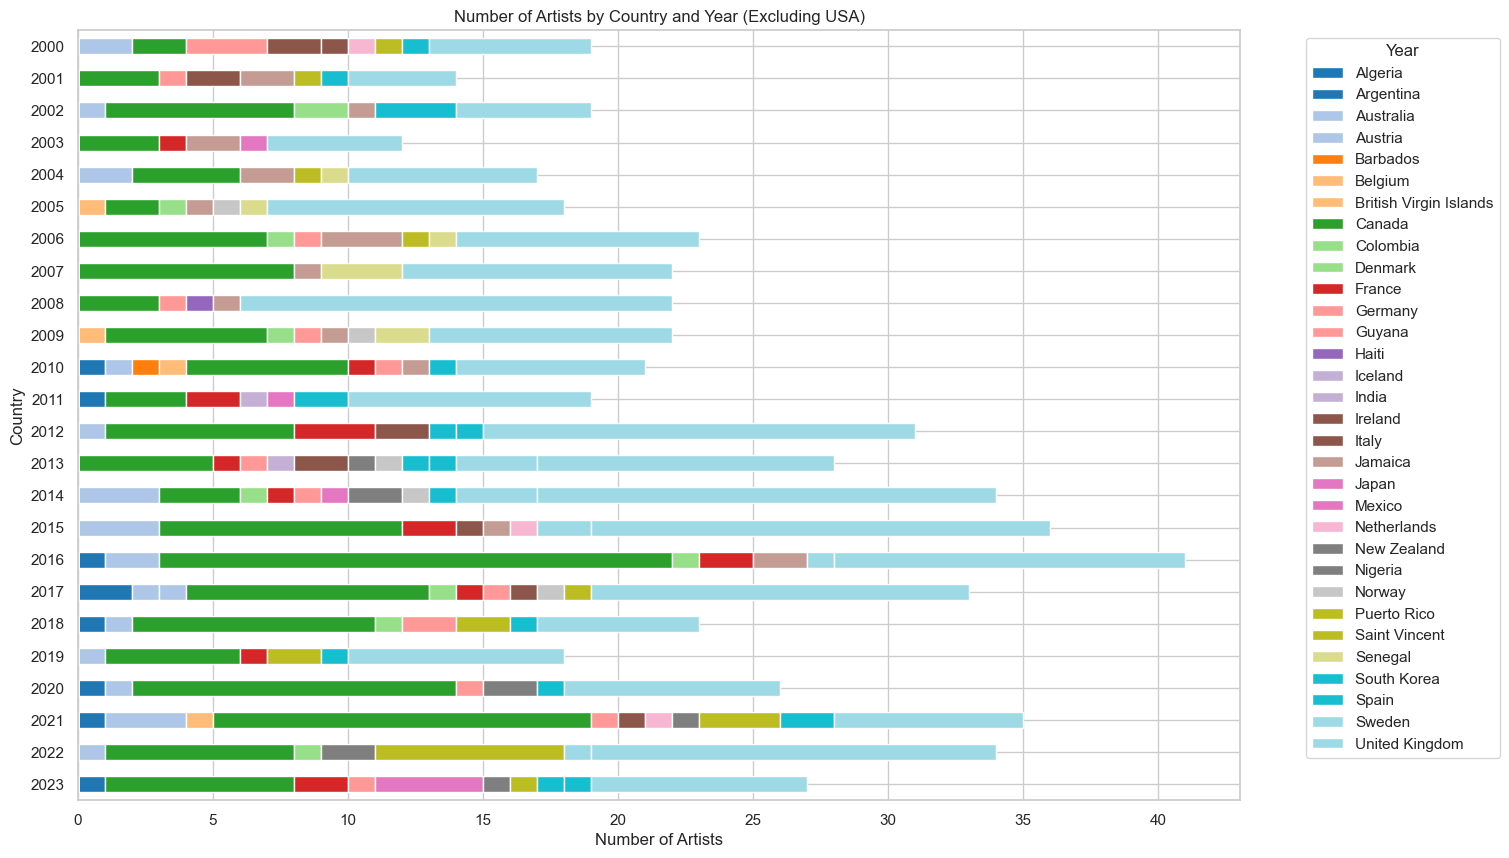

In [67]:
# 연도별로 국가별 가수 수 계산
year_country_grouped = df_sorted.groupby(['year', 'Country_Fullname']).size().unstack(fill_value=0)

# 'United States'를 제외한 데이터프레임 생성
year_country_grouped_excl_us = year_country_grouped.drop(columns='United States')

# 그래프 생성
plt.figure(figsize=(15, 10))
year_country_grouped_excl_us.plot(kind='barh', stacked=True, figsize=(15, 10), cmap='tab20')

# 그래프 설정
plt.xlabel('Number of Artists')
plt.ylabel('Country')
plt.title('Number of Artists by Country and Year (Excluding USA)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()  # 국가명을 위에서 아래로 보여주기 위해 Y축 반전
plt.show()

# 23년간 빌보다 100에 가장 많이 등록된 가수 top 30

In [68]:
# 가수별로 빌보드 100에 이름을 올린 횟수 계산
artist_counts = df_sorted['band_singer'].value_counts().reset_index()
artist_counts.columns = ['band_singer', 'count']

# 상위 30명의 가수 추출
top_30_artists = artist_counts.head(30)

# 상위 30명의 가수와 국적 정보를 병합하여 국적 정보 추가
top_30_artists = pd.merge(top_30_artists, df_sorted[['band_singer', 'Country_Fullname']].drop_duplicates(), on='band_singer', how='left')

# 결과 확인
print(top_30_artists)

            band_singer  count Country_Fullname
0                 Drake     40           Canada
1               Rihanna     33    United States
2          Taylor Swift     31    United States
3              Maroon 5     25    United States
4           Chris Brown     24    United States
5               Beyoncé     21    United States
6                 Usher     20    United States
7         Ariana Grande     20    United States
8                  Pink     19    United States
9            Katy Perry     18    United States
10           The Weeknd     18           Canada
11          Post Malone     17    United States
12       Kelly Clarkson     17    United States
13               Eminem     17    United States
14           Ed Sheeran     16   United Kingdom
15    Justin Timberlake     16    United States
16            Lady Gaga     16    United States
17        Justin Bieber     16           Canada
18  The Black Eyed Peas     15    United States
19           Luke Combs     14    United

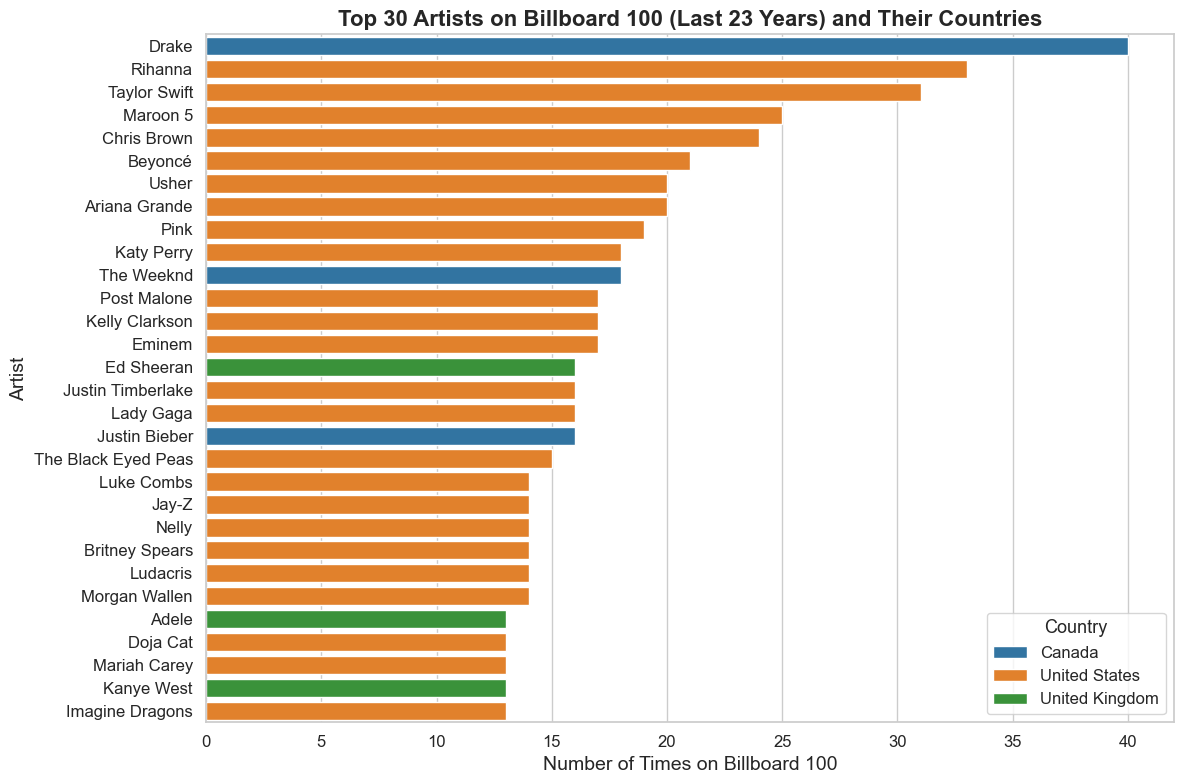

In [69]:
# 데이터 로드 및 정리 (이미 제공된 코드를 기반으로)
artist_counts = df_sorted['band_singer'].value_counts().reset_index()
artist_counts.columns = ['band_singer', 'count']
top_30_artists = artist_counts.head(30)
top_30_artists = pd.merge(top_30_artists, df_sorted[['band_singer', 'Country_Fullname']].drop_duplicates(), on='band_singer', how='left')

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='band_singer', hue='Country_Fullname', data=top_30_artists, dodge=False, palette="tab10")

# 그래프 제목과 레이블 설정
plt.title('Top 30 Artists on Billboard 100 (Last 23 Years) and Their Countries', fontsize=16, weight='bold')
plt.xlabel('Number of Times on Billboard 100', fontsize=14)
plt.ylabel('Artist', fontsize=14)

# 레이블 크기 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 범례 설정
plt.legend(title='Country', fontsize=12, title_fontsize='13', loc='lower right')

# 그래프 표시
plt.tight_layout()
plt.show()

# 23년간 미국 제외 타국가 빌보드챠트 진입챠트

/var/folders/vk/k2jbrnys5674kpkvxhf0q_8r0000gn/T/ipykernel_4196/1070644921.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_country_grouped_excl_us['year'] = year_country_grouped_excl_us['year'].astype(str)


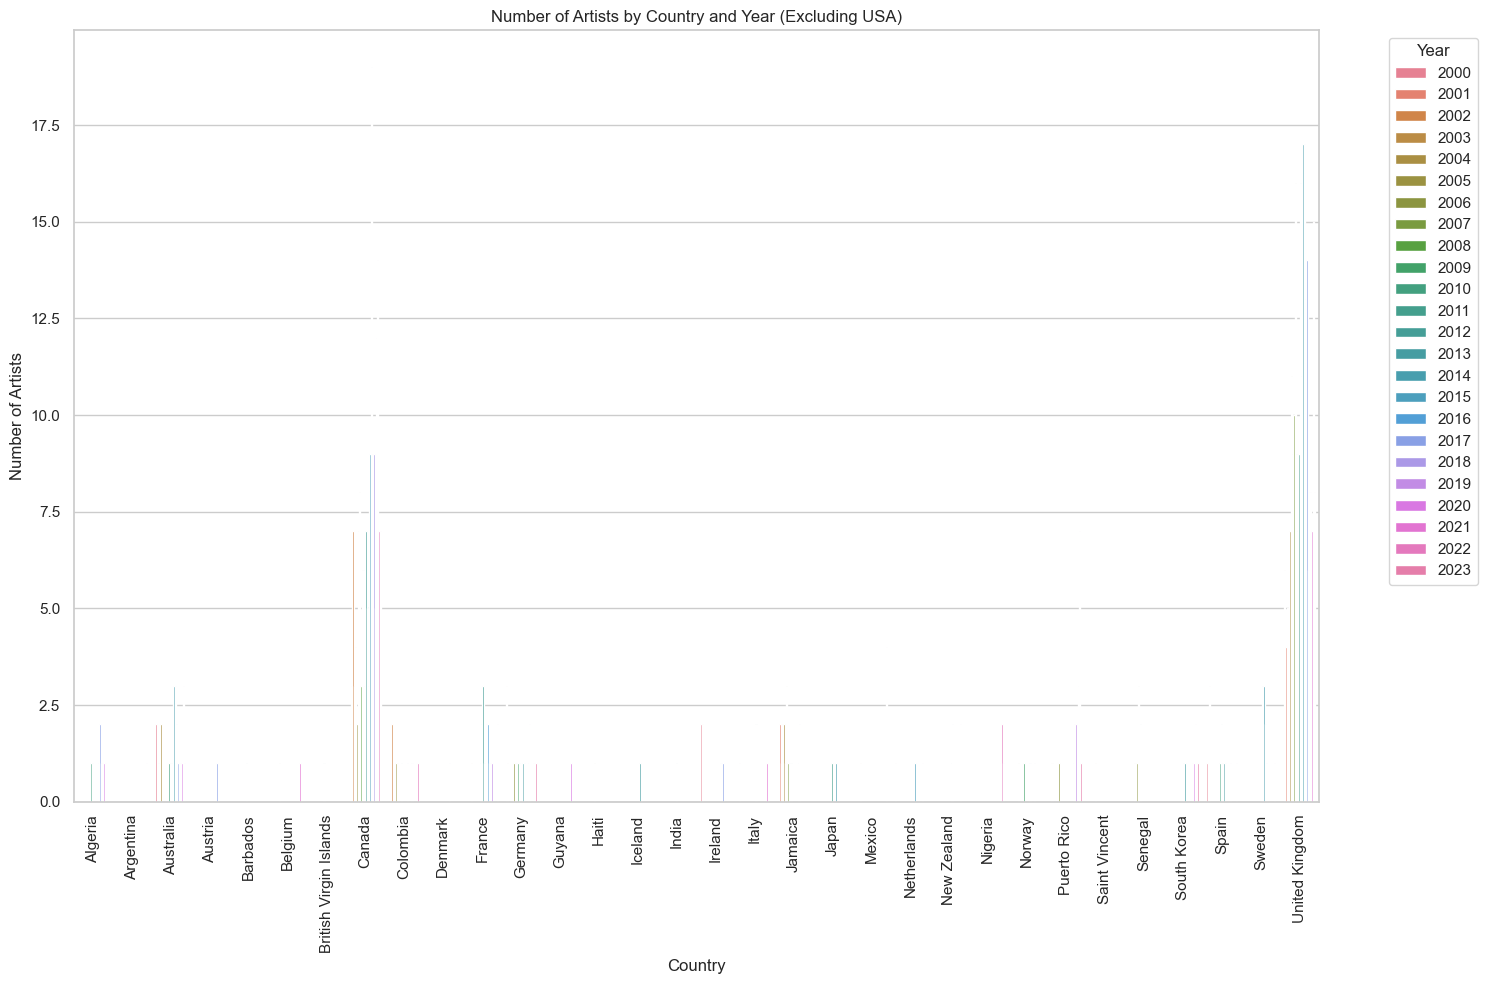

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별로 국가별 가수 수를 계산
year_country_grouped = df_sorted.groupby(['Country_Fullname', 'year']).size().reset_index(name='Artist Count')

# 'United States'를 제외한 데이터프레임 생성
year_country_grouped_excl_us = year_country_grouped[year_country_grouped['Country_Fullname'] != 'United States']

# 연도를 문자열로 변환
year_country_grouped_excl_us['year'] = year_country_grouped_excl_us['year'].astype(str)

# 연도를 정렬하여 hue_order 생성
sorted_years = sorted(year_country_grouped_excl_us['year'].unique())

# 고유한 연도를 추출하여 색상 팔레트 생성
palette = sns.color_palette("husl", len(sorted_years))

# 그래프 생성
plt.figure(figsize=(15, 10))
sns.barplot(x='Country_Fullname', y='Artist Count', hue='year', data=year_country_grouped_excl_us, 
            palette=palette, hue_order=sorted_years)

# 그래프 설정
plt.xlabel("Country")
plt.ylabel("Number of Artists")
plt.title("Number of Artists by Country and Year (Excluding USA)")
plt.xticks(rotation=90)  # 국가 이름이 잘 보이도록 가로축 레이블을 90도 회전
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
%%bash
pip install bar_chart_race

In [72]:
import bar_chart_race as bcr
!brew install ffmpeg

zsh:1: command not found: brew


In [75]:
import pandas as pd
import bar_chart_race as bcr
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# 연도별 국가별 가수 수를 계산, 0인 국가도 포함
artist_count_by_year_country = df_sorted.groupby(['year', 'Country_Fullname'])['band_singer'].nunique().unstack(fill_value=0)

# South Korea의 값이 처음으로 1이 된 연도를 확인
year_of_interest = artist_count_by_year_country[artist_count_by_year_country['South Korea'] == 1].index[0]

# 해당 연도의 데이터를 복제하여 애니메이션에서 멈춤 효과를 추가
frames_to_add = 20  # 멈출 프레임 수 (10초간 멈추는 효과를 내기 위해 해당 프레임을 반복 추가)
df_pause = pd.DataFrame([artist_count_by_year_country.loc[year_of_interest]] * frames_to_add, index=[f'{year_of_interest} (Paused {i+1})' for i in range(frames_to_add)])

# 애니메이션을 위해 원래 데이터프레임에 추가
df_bcr_extended = pd.concat([artist_count_by_year_country.loc[:year_of_interest], df_pause, artist_count_by_year_country.loc[year_of_interest+1:]])

# 바 차트 레이스 생성 (미국 포함)
bcr.bar_chart_race(
    df=artist_count_by_year_country,
    filename=None,  # 파일로 저장하지 않고 바로 표시
    orientation='h',  # 수평 막대
    sort='desc',  # 내림차순 정렬
    n_bars=len(artist_count_by_year_country.columns),  # 모든 국가 포함
    fixed_order=False,  # 고정된 순서가 아닌 값에 따라 순위 변경
    fixed_max=True,  # 막대 최대 길이 고정
    steps_per_period=30,  # 애니메이션 부드럽게 하기 위한 스텝 수
    interpolate_period=True,  # 각 기간 사이에 값을 보간하여 애니메이션 부드럽게 함
    label_bars=True,  # 각 막대에 레이블 표시
    bar_size=.90,  # 막대 크기
    period_length=1000,  # 각 기간 애니메이션 지속 시간 (ms)
    figsize=(6, 5),  # 그래프 크기 설정 (가로를 6으로 줄임)
    cmap='tab20b',  # 특정 팔레트를 사용해 South Korea에 색상을 자동 할당
    title='Bar Chart Race of Artist Counts (Including USA)',  # 그래프 제목 수정
    bar_label_size=7,  # 막대 레이블 글자 크기
    tick_label_size=7,  # 축 레이블 글자 크기
    scale='linear',  # 축 스케일 설정
    period_fmt=' ',  # 우측 상단에 연도 표시 형식 설정
    period_summary_func=lambda v, r: {'x': .95, 'y': .80,
                                      's': f'{int(r.name)}',  # 연도를 정수로 변환하여 표시
                                      'ha': 'right', 'size': 20, 'weight': 'bold', 'color': 'blue'}  # 폰트 크기, 두께, 색상 설정
)

In [76]:
import pandas as pd
import bar_chart_race as bcr
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# 연도별 국가별 가수 수를 계산, 0인 국가도 포함
artist_count_by_year_country = df_sorted.groupby(['year', 'Country_Fullname'])['band_singer'].nunique().unstack(fill_value=0)

# 'United States'를 제외한 데이터프레임 생성
df_bcr = artist_count_by_year_country.drop(columns='United States')

# South Korea의 값이 처음으로 1이 된 연도를 확인
year_of_interest = df_bcr[df_bcr['South Korea'] == 1].index[0]

# 해당 연도의 데이터를 복제하여 애니메이션에서 멈춤 효과를 추가
frames_to_add = 20  # 멈출 프레임 수 (10초간 멈추는 효과를 내기 위해 해당 프레임을 반복 추가)
df_pause = pd.DataFrame([df_bcr.loc[year_of_interest]] * frames_to_add, index=[f'{year_of_interest} (Paused {i+1})' for i in range(frames_to_add)])

# 애니메이션을 위해 원래 데이터프레임에 추가
df_bcr_extended = pd.concat([df_bcr.loc[:year_of_interest], df_pause, df_bcr.loc[year_of_interest+1:]])

# 바 차트 레이스 생성
bcr.bar_chart_race(
    df=df_bcr,
    filename=None,  # 파일로 저장하지 않고 바로 표시
    orientation='h',  # 수평 막대
    sort='desc',  # 내림차순 정렬
    n_bars=len(df_bcr.columns),  # 모든 국가 포함
    fixed_order=False,  # 고정된 순서가 아닌 값에 따라 순위 변경
    fixed_max=True,  # 막대 최대 길이 고정
    steps_per_period=30,  # 애니메이션 부드럽게 하기 위한 스텝 수
    interpolate_period=True,  # 각 기간 사이에 값을 보간하여 애니메이션 부드럽게 함
    label_bars=True,  # 각 막대에 레이블 표시
    bar_size=.90,  # 막대 크기
    period_length=1000,  # 각 기간 애니메이션 지속 시간 (ms)
    figsize=(6, 5),  # 그래프 크기 설정 (가로를 6으로 줄임)
    cmap='tab20b',  # 특정 팔레트를 사용해 South Korea에 색상을 자동 할당
    title='Bar Chart Race of Artist Counts (Excluding USA)',  # 그래프 제목
    bar_label_size=7,  # 막대 레이블 글자 크기
    tick_label_size=7,  # 축 레이블 글자 크기
    scale='linear',  # 축 스케일 설정
    period_fmt=' ',  # 우측 상단에 연도 표시 형식 설정
    period_summary_func=lambda v, r: {'x': .95, 'y': .80,
                                      's': f'{int(r.name)}',  # 연도를 정수로 변환하여 표시
                                      'ha': 'right', 'size': 20, 'weight': 'bold', 'color': 'blue'}  # 폰트 크기, 두께, 색상 설정
)

# 연도별 미국 국적 가수비율을 보여주는 시각화
### 23년간 미국 국적 가수비율이 최소 64% 이상으로 확인됨.
### 따라서, 미국가수를 포함한 분석은 다른 국가의 음악 산업이 차트에 미치는 영향을 정확하게 측정하기 어려울수 있음.
### 미국을 제외하고 분석함으로써 글로벌 음악 산업의 다양성과 각국의 음악적 영향력을 더 잘이해할수 있음.
     
## 2016년에는 어느 국적의 가수들이 활발히 활동했을까?

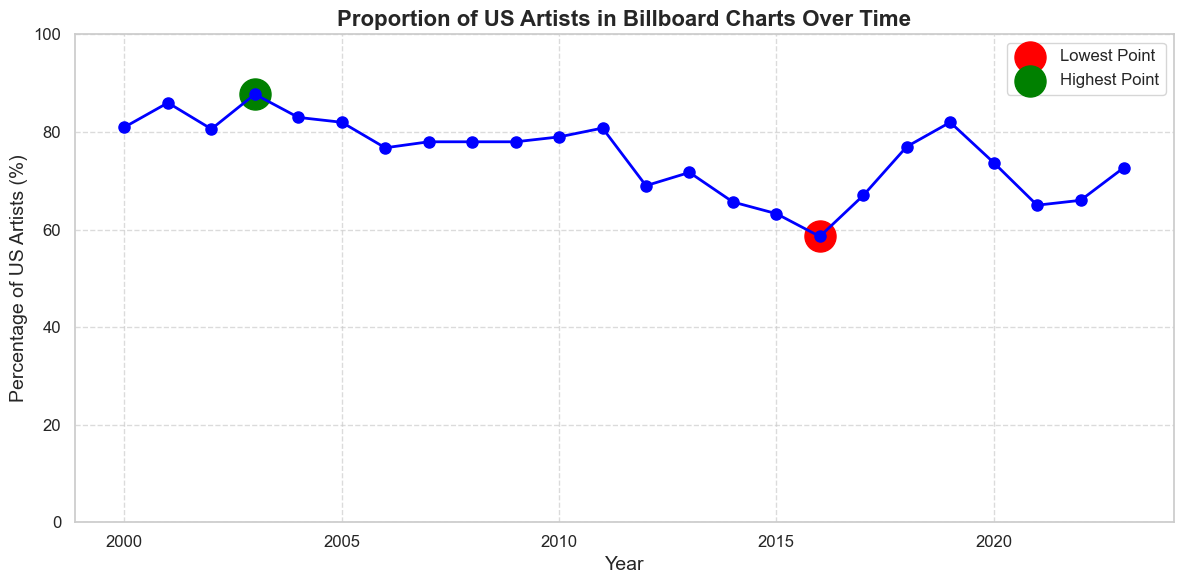

In [77]:
# 연도별 미국 가수 비율 계산
total_artists_per_year = df_sorted.groupby('year')['band_singer'].count()
us_artists_per_year = df_sorted[df_sorted['Country_Fullname'] == 'United States'].groupby('year')['band_singer'].count()
us_artist_ratio = (us_artists_per_year / total_artists_per_year) * 100

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(us_artist_ratio.index, us_artist_ratio.values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

# 중요한 데이터 포인트 강조 (최고점과 최저점)
plt.scatter(us_artist_ratio.idxmin(), us_artist_ratio.min(), color='red', s=500, label='Lowest Point')
plt.scatter(us_artist_ratio.idxmax(), us_artist_ratio.max(), color='green', s=500, label='Highest Point')

# 제목과 레이블 설정
plt.title('Proportion of US Artists in Billboard Charts Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of US Artists (%)', fontsize=14)

# 축 설정
plt.ylim(0, 100)  # y축을 0%에서 100%까지 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()


# 2016년 빌보드 100 에서 국가별 진출 가수 
  - 캐나다 가수들의 인기가 좋았음

In [78]:
# 2016년도 데이터 필터링
df_2016 = df_sorted[df_sorted['year'] == 2016]

# 국가별 가수 이름을 중복 포함하여 리스트로 저장
artists_by_country_2016 = df_2016.groupby('Country_Fullname')['band_singer'].apply(list)

# 국가별 가수 등장 횟수 계산
artist_count_by_country_2016 = df_2016.groupby('Country_Fullname')['band_singer'].count()

# 결과 확인
for country, artists in artists_by_country_2016.items():
    print(f"{country} (Total Count: {artist_count_by_country_2016[country]}):")
    for artist in artists:
        print(f" - {artist}")

Algeria (Total Count: 1):
 - DJ Khaled
Australia (Total Count: 2):
 - Sia
 - Flume
Canada (Total Count: 19):
 - Justin Bieber
 - Justin Bieber
 - Drake
 - Shawn Mendes
 - Drake
 - Shawn Mendes
 - Drake
 - Justin Bieber
 - The Weeknd
 - Drake
 - Alessia Cara
 - Drake
 - The Weeknd
 - The Weeknd
 - Tory Lanez
 - The Weeknd
 - Tory Lanez
 - Drake
 - Shawn Mendes
Denmark (Total Count: 1):
 - Lukas Graham
France (Total Count: 2):
 - DJ Snake
 - DJ Snake
Jamaica (Total Count: 2):
 - Major Lazer
 - Major Lazer
Sweden (Total Count: 1):
 - Zara Larsson
United Kingdom (Total Count: 13):
 - Adele
 - The Chainsmokers
 - The Chainsmokers
 - Calvin Harris
 - Zayn
 - Adele
 - The Chainsmokers
 - Nick Jonas
 - Coldplay
 - Ellie Goulding
 - Adele
 - Coldplay
 - One Direction
United States (Total Count: 58):
 - Rihanna
 - Twenty One Pilots
 - Desiigner
 - Justin Timberlake
 - Rihanna
 - Flo Rida
 - Mike Posner
 - Fifth Harmony
 - DNCE
 - G-Eazy
 - Twenty One Pilots
 - Twenty One Pilots
 - Future
 - P!nk

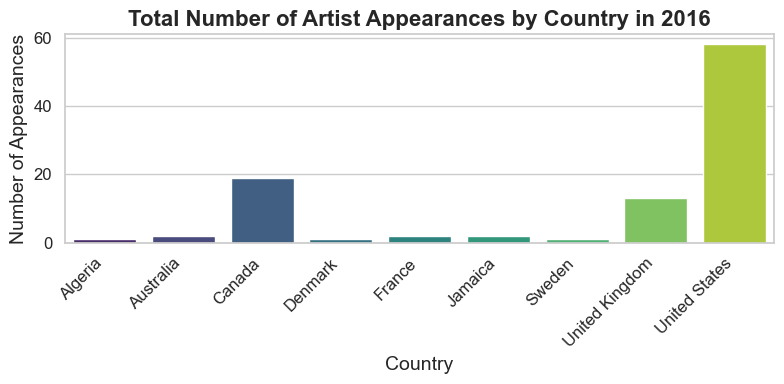

In [79]:
# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(x=artist_count_by_country_2016.index, y=artist_count_by_country_2016.values, palette="viridis")

# 그래프 제목과 레이블 설정
plt.title('Total Number of Artist Appearances by Country in 2016', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Appearances', fontsize=14)

# 레이블 크기 조정 및 회전
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()

# 23년간 미국, 영국, 캐나다를 제외한 타 국가들 중 Top 3 국가는?

  - Top 1은 역시나 영어권인 호주
  - Top 2,3는 의외로 푸에르토 리코랑 자메이카

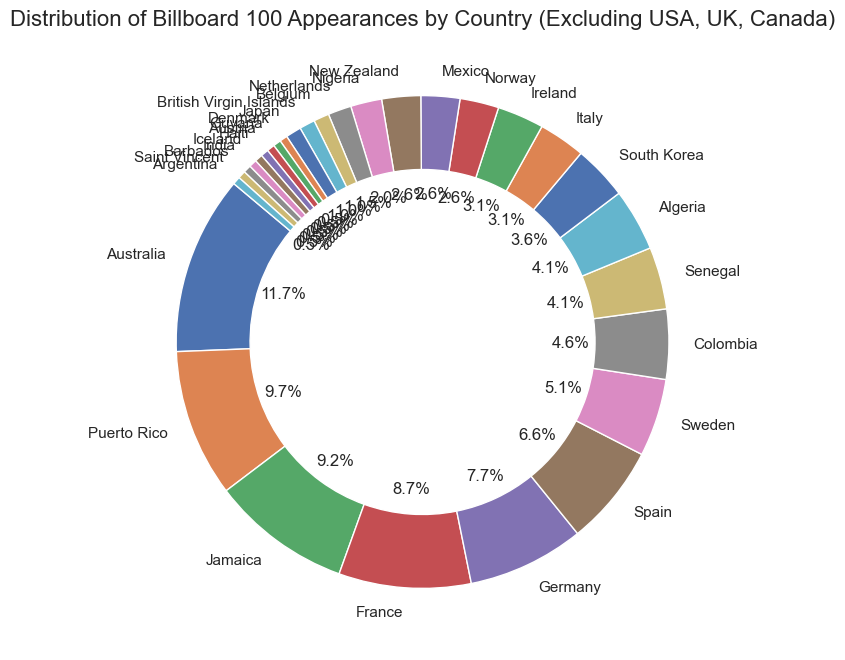

In [80]:
# 미국, 영국, 캐나다 를 제외한 데이터 필터링
filtered_df = df_sorted[~df_sorted['Country_Fullname'].isin(['United States', 'United Kingdom', 'Canada'])]

# 국가별 출현 횟수 계산
country_counts = filtered_df['Country_Fullname'].value_counts()

# 도넛형 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# 차트 제목 추가
plt.title('Distribution of Billboard 100 Appearances by Country (Excluding USA, UK, Canada)', fontsize=16)

# 도넛형 차트 표시
plt.show()